In [1]:
import numpy as np
import pandas as pd

In [21]:
import pandas as pd

# Specific data for study time (x) and score (y)
# data = {
#     'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Study time in hours
#     'y': [3, 4, 5, 6, 7, 8, 8, 9, 10, 10]  # Score out of 10
# }

data = {
    'x': np.random.randint(1, 10, size=10),  # Study time in hours
    'y': np.random.randint(4, 10, size=10)   # Score out of 10
}

# Create a DataFrame
df = pd.DataFrame(data)

print("DataFrame:")
print(df)


DataFrame:
   x  y
0  1  4
1  2  6
2  3  7
3  2  7
4  4  7
5  9  9
6  6  7
7  9  7
8  5  8
9  7  8


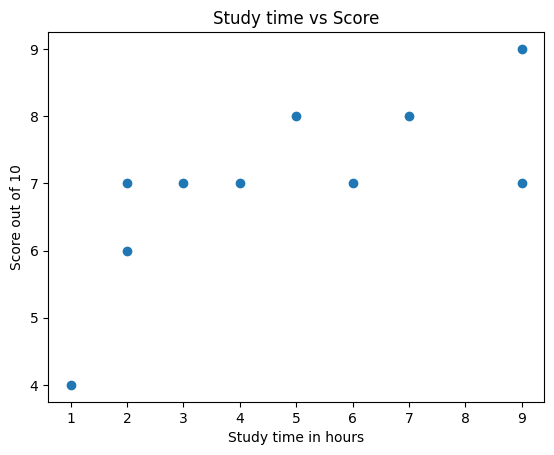

In [22]:
#scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['x'], df['y'])
plt.xlabel('Study time in hours')
plt.ylabel('Score out of 10')
plt.title('Study time vs Score')
plt.show()

### Pedhazur Formula

In [23]:
#formula : if y = b0 + b1*x
# b1 = sum((xi - x_mean) * (yi - y_mean)) / sum((xi - x_mean)^2)
# b0 = y_mean - b1 * x_mean

x_mean = np.mean(df['x'])
y_mean = np.mean(df['y'])
b1 = np.sum((df['x'] - x_mean) * (df['y'] - y_mean)) / np.sum((df['x'] - x_mean) ** 2)
b0 = y_mean - b1 * x_mean

print(f"b0: {b0}")
print(f"b1: {b1}")

b0: 5.412698412698413
b1: 0.33068783068783064


In [24]:
predicted = b0 + b1 * df['x']
predicted

0    5.743386
1    6.074074
2    6.404762
3    6.074074
4    6.735450
5    8.388889
6    7.396825
7    8.388889
8    7.066138
9    7.727513
Name: x, dtype: float64

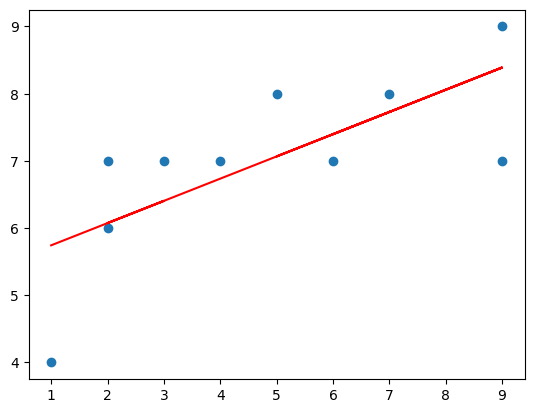

In [25]:
plt.plot(df['x'], predicted, color='red')
plt.scatter(df['x'], df['y'])
plt.show()

In [28]:
b0_pedhazur = b0
b1_pedhazur = b1

#RMSE
rmse = np.sqrt(np.sum(df['y'] - predicted) ** 2 / len(df))
rmse

1.1234667099445444e-15

### Calculus Method

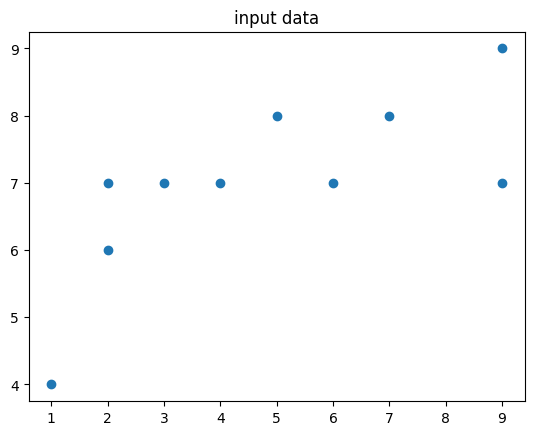

In [32]:
plt.scatter(df['x'], df['y'])
plt.title("input data")
plt.show()

In [34]:
x = df['x']
y = df['y']
x = np.array(x)
y = np.array(y)
x, y

(array([1, 2, 3, 2, 4, 9, 6, 9, 5, 7]), array([4, 6, 7, 7, 7, 9, 7, 7, 8, 8]))

In [43]:
x_design = np.vstack([np.ones(len(x)), x]).T
x_design

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 2.],
       [1., 4.],
       [1., 9.],
       [1., 6.],
       [1., 9.],
       [1., 5.],
       [1., 7.]])

In [38]:
coeff = np.linalg.inv(x_design.T @ x_design) @ x_design.T @ y
b0, b1 = coeff
b0, b1

(5.412698412698417, 0.3306878306878306)

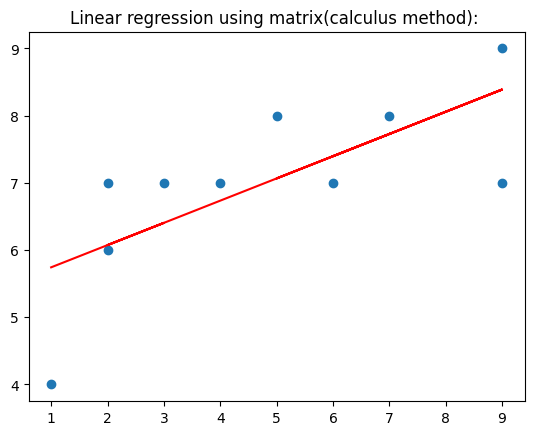

In [41]:
pred = b0 + b1*df['x']  
plt.plot(df['x'], pred, color='red')
plt.scatter(df['x'], df['y'])
plt.title("Linear regression using matrix(calculus method): ")
plt.show()

In [44]:
time_spen = 10
score = b0 + b1 * time_spen
score

8.719576719576722